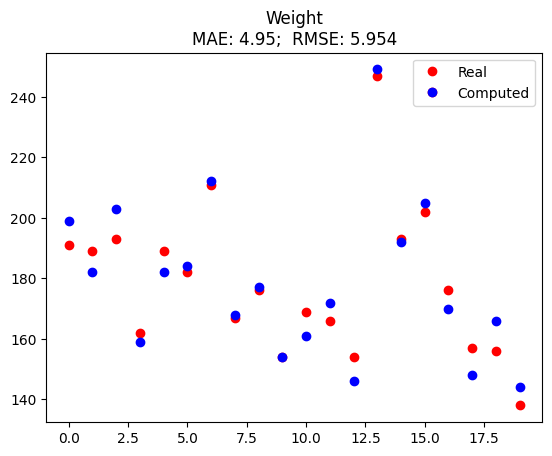

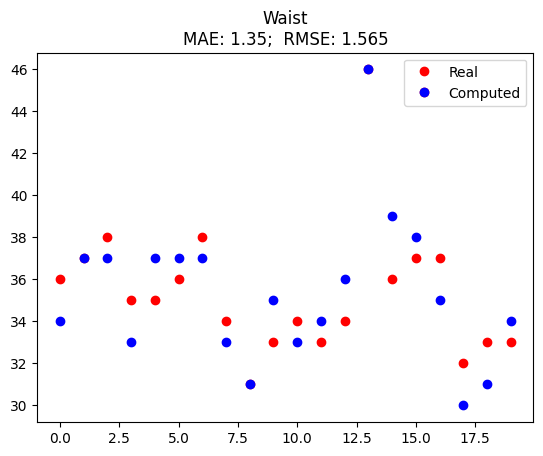

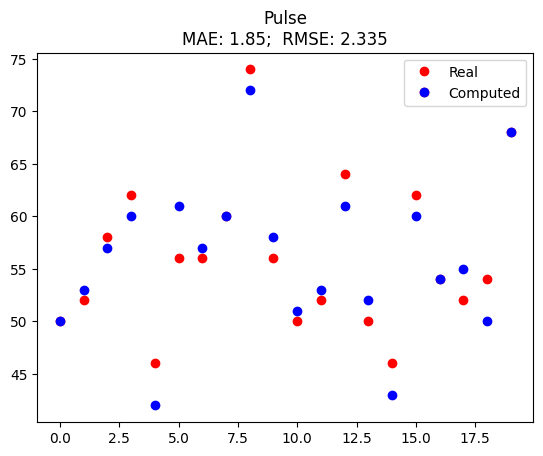

3.8013155617496426

In [1]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt


def plot_sport(real_values, computed_values, title):
    N = len(real_values)
    indexes = [i for i in range(N)]
    real, = plt.plot(indexes, real_values, 'ro', label = 'real')
    computed, = plt.plot(indexes, computed_values, 'bo', label = 'computed')

    plt.legend([real, (real, computed)], ["Real", "Computed"])
    
    # Mean Absolute Error
    MAE = sum(abs(r - c) for r, c in zip(real_values, computed_values)) / N
    # Root Mean Square Error
    RMSE = sqrt(sum((r - c) ** 2 for r, c in zip(real_values, computed_values)) / N)
    
    plt.title(f"{title}\nMAE: {MAE};  RMSE: {RMSE:.3f}")
    plt.show()

def check_sports():
    sports = pd.read_csv('sport.csv')
    Weight, PredictedWeight = sports['Weight'].tolist(), sports['PredictedWeight'].tolist()
    Waist, PredictedWaist = sports['Waist'].tolist(), sports['PredictedWaist'].tolist()
    Pulse, PredictedPulse = sports['Pulse'].tolist(), sports['PredictedPulse'].tolist()
    
    plot_sport(Weight, PredictedWeight, "Weight")
    plot_sport(Waist, PredictedWaist, "Waist")
    plot_sport(Pulse, PredictedPulse, "Pulse")

    return sqrt(sum((r - c) ** 2 for r, c in zip(Weight+Waist+Pulse, PredictedWeight+PredictedWaist+PredictedPulse)) / len(Weight+Waist+Pulse))

check_sports()

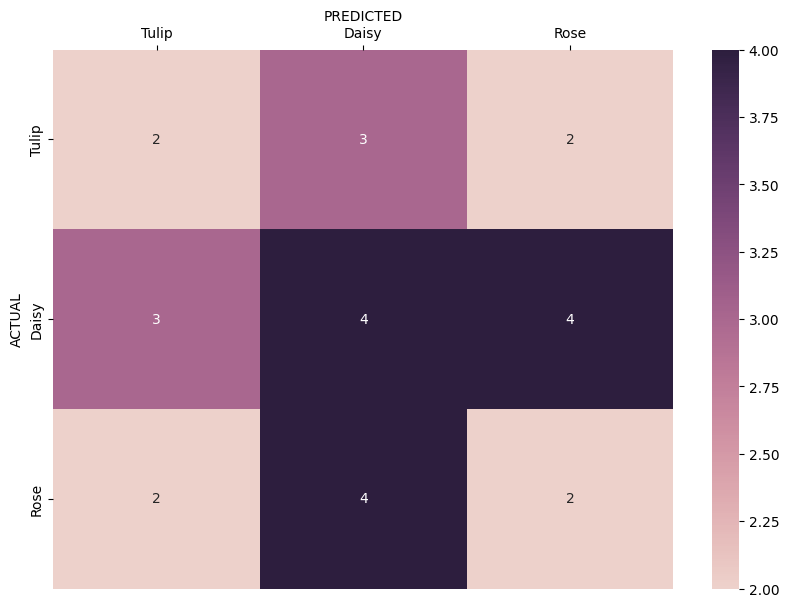

(0.3076923076923077,
 array([0.28571429, 0.36363636, 0.25      ]),
 array([0.28571429, 0.36363636, 0.25      ]))

In [2]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def eval_classification(real_values, computed_values, label_names):
    matrix = confusion_matrix(real_values, computed_values, labels = label_names)
    accuracy = accuracy_score(real_values, computed_values)
    precision = precision_score(real_values, computed_values, average = None, labels = label_names)
    recall = recall_score(real_values, computed_values, average = None, labels = label_names)
    return matrix, accuracy, precision, recall 

def check_flowers():
    flowers = pd.read_csv('flowers.csv')
    Type, PredictedType = flowers['Type'].tolist(), flowers['PredictedType'].tolist()
    eval_classification(Type, PredictedType, ['Tulip', 'Daisy', 'Rose'])
    # tulips = {'Tulip': 0, 'Daisy': 0, 'Rose': 0}
    # daisies = {'Tulip': 0, 'Daisy': 0, 'Rose': 0}
    # roses = {'Tulip': 0, 'Daisy': 0, 'Rose': 0}

    # for real, predicted in zip(Type, PredictedType):
    #     if real == 'Tulip':
    #         tulips[predicted] += 1
    #     elif real == 'Daisy':
    #         daisies[predicted] += 1
    #     elif real == 'Rose':
    #         roses[predicted] += 1
    # arr = np.transpose(np.array([tulips.values(), daisies.values(), roses.values()])).tolist()

    flower_types = ['Tulip', 'Daisy', 'Rose']
    arr, accuracy, precision, recall = eval_classification(Type, PredictedType, flower_types)

    df_cm = pd.DataFrame(arr, index = flower_types, columns = flower_types)
    plt.figure(figsize = (10,7))
    

    ax = sn.heatmap(df_cm, annot=True, cmap=sn.cubehelix_palette(as_cmap=True))
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set(xlabel="PREDICTED", ylabel="ACTUAL")
    plt.show()
    return accuracy, precision, recall

check_flowers()